## Boston Marathon Results for 2014

This data was found [here](https://github.com/llimllib/bostonmarathon).

I will attempt to do some fun things with our clustering.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
df.shape

(31984, 21)

In [6]:
null = df.isnull().sum() / len(df)
null[null > 0]

ctz      0.961106
state    0.080540
city     0.000031
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [8]:
change = ['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k']

for column in change:
    lst = []
    print('{}'.format(column))
    for i in range(len(df[column])):
        try:
            lst.append(float(df[column][i]))
        except:
            print(df[column][i])
    #replace our values
    median = str(np.median(lst))
    df[column].replace('-', median, inplace=True)

#for column in change:
    #df.astype({column : 'float64'})

10k
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
25k
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
35k
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
30k
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
5k
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
half
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
20k
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


In [9]:
#filled null values -- now time to convert these into floating points
for column in change:
    df[column] = df[column].astype('float64')

In [10]:
null = df.isnull().sum() / len(df)
null[null > 0]

ctz      0.961106
state    0.080540
city     0.000031
dtype: float64

In [11]:
df = df.drop(columns='ctz')
df.dropna(inplace=True)

In [12]:
null = df.isnull().sum() / len(df)
null[null > 0]

Series([], dtype: float64)

In [13]:
df.shape

(29408, 20)

## Brief Data Exploration

In [14]:
averages = df.groupby('age').describe()['half']['mean']
index = df.groupby('age').describe().index

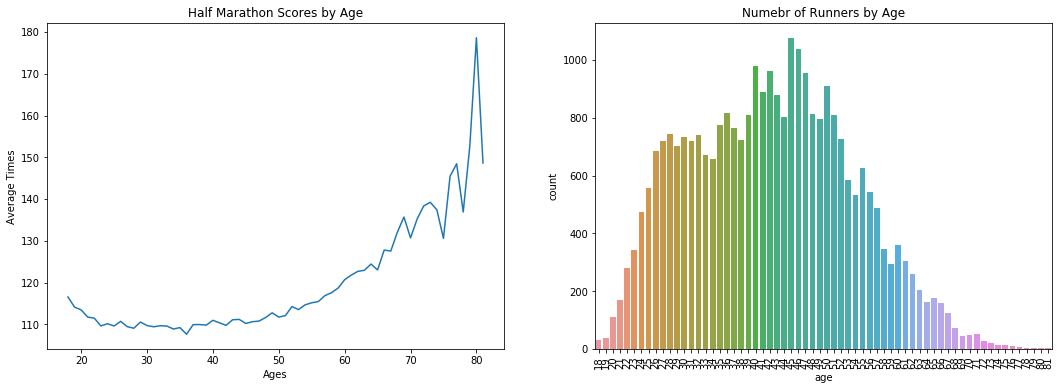

In [15]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.lineplot(index, averages)
plt.title('Half Marathon Scores by Age')
plt.xlabel('Ages')
plt.ylabel('Average Times')

plt.subplot(1, 2, 2)
sns.countplot(df['age'])
plt.title('Numebr of Runners by Age')
plt.xticks(rotation='vertical')
plt.show()

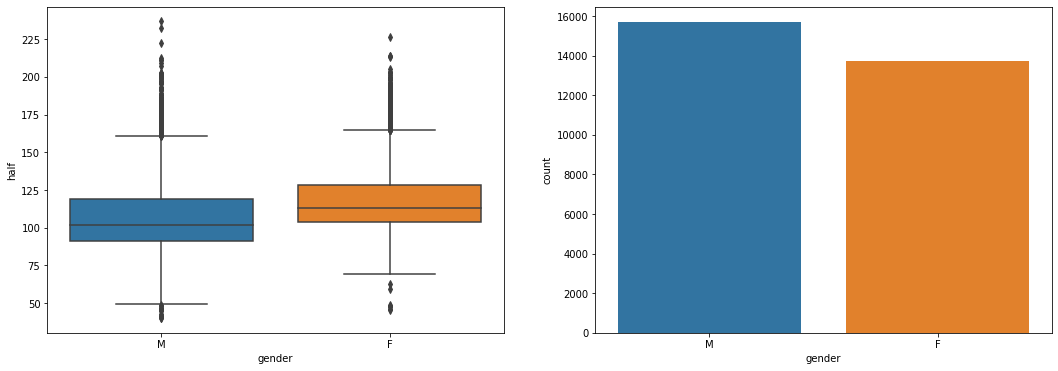

In [16]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='half', data=df)

plt.subplot(1, 2, 2)
sns.countplot(df['gender'])
plt.show()

## Deciding on number of clusters

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Make sure the number of rows divides evenly into four samples.
rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

In [18]:
df['city'].nunique()

4668

Set up our X variables.

In [19]:
numeric_columns = ['10k', '25k', 'age', 'official', '35k', 'overall', 'pace', '30k', '5k', 'half', '20k', '40k']

gender = pd.get_dummies(df['gender'])
states = pd.get_dummies(df['state'], drop_first=True)
countries = pd.get_dummies(df['country'], drop_first=True)
cities = pd.get_dummies(df['city'], drop_first=True)

dummies_df = pd.concat([gender, states, countries], axis=1)

In [20]:
X = pd.concat([dummies_df, df[numeric_columns]], axis=1)
X.shape

(29408, 82)

Split into four equal groups and see which one is the most consistent.

In [21]:
# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

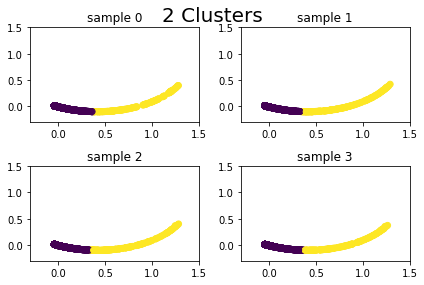

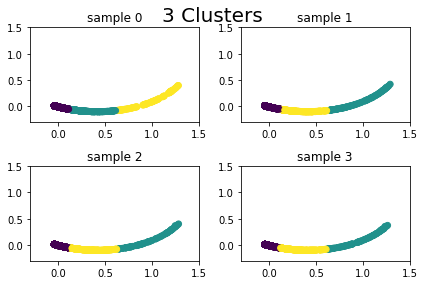

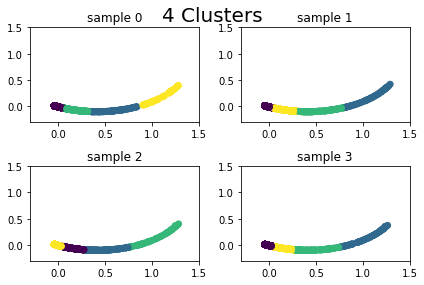

In [22]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-0.3, 1.5])
        axarr[rows, cols].set_ylim([-0.3, 1.5])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

These all look shockingly similar...let's try the silhouette coefficient.

### Silhouette Coefficient

In [23]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.9340810732339808
0.9242626561713139
0.9266649794348981
0.9340651959309851


In [24]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.8822514660764966
0.8794179143537996
0.8781704231379249
0.8805186102034572


In [25]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.839947871843007
0.8326406672886808
0.8194201912754505
0.8269686922046761


There are all very good, but 2 clusters performs the best. Let's do that!

## Come back here and try some generic clustering!!!

In [26]:
df.head(2)

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83
14,17.12,"Cassidy, Josh R.",13,48.88,M,29,87.40,W8,13,72.83,13,3.35,ON,60.82,8.02,40.20,38.02,CAN,Port Elgin,82.38


In [27]:
#with lots of data about how they're doing throughout - only include if you want some data leakage!
numeric_columns = ['10k', '25k', 'age', 'official', '35k', 'overall', 'pace', '30k', '5k', 'half', '20k', '40k']


gender = pd.get_dummies(df['gender'])
states = pd.get_dummies(df['state'], drop_first=True)
countries = pd.get_dummies(df['country'], drop_first=True)
cities = pd.get_dummies(df['city'], drop_first=True)

dummies_df = pd.concat([gender, states, countries, cities], axis=1)

In [36]:
X = pd.concat([df[numeric_columns], dummies_df], axis=1)
km = KMeans(n_clusters=2, random_state=42)

km.fit(X)

labels = km.labels_

In [37]:
df['groups'] = labels

In [38]:
df.groups.value_counts()

0    14747
1    14661
Name: groups, dtype: int64

In [39]:
group_0 = df.loc[df.groups == 0]
group_1 = df.loc[df.groups == 1]

In [40]:
group_0['gender'].value_counts()

F    8216
M    6531
Name: gender, dtype: int64

In [41]:
group_1['gender'].value_counts()

M    9160
F    5501
Name: gender, dtype: int64

In [42]:
group_0['country'].value_counts()

USA    13897
CAN      850
Name: country, dtype: int64

In [43]:
group_1['country'].value_counts()

USA    13336
CAN     1325
Name: country, dtype: int64

## Keep doing analysis of the 2 groups!

In [48]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k', 'groups'],
      dtype='object')

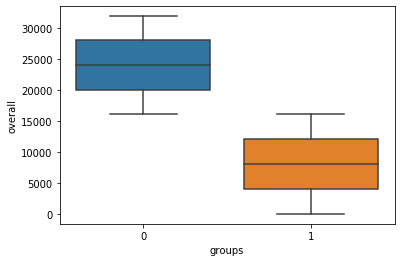

In [58]:
sns.boxplot(x='groups', y='overall', data=df)
plt.show()

In [49]:
group_1['overall'].describe()

count    14661.000000
mean      8082.400928
std       4640.609169
min          1.000000
25%       4104.000000
50%       8116.000000
75%      12118.000000
max      16063.000000
Name: overall, dtype: float64

In [51]:
group_0['overall'].describe()

count    14747.000000
mean     24045.494406
std       4586.540281
min      16066.000000
25%      20078.500000
50%      24068.000000
75%      28025.500000
max      31931.000000
Name: overall, dtype: float64

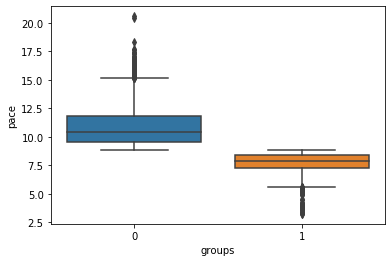

In [59]:
sns.boxplot(x='groups', y='pace', data=df)
plt.show()

In [56]:
group_0['pace'].describe()

count    14747.000000
mean        10.852925
std          1.609716
min          8.880000
25%          9.550000
50%         10.470000
75%         11.800000
max         20.570000
Name: pace, dtype: float64

In [57]:
group_1['pace'].describe()

count    14661.000000
mean         7.755599
std          0.755413
min          3.250000
25%          7.250000
50%          7.870000
75%          8.370000
max          8.880000
Name: pace, dtype: float64

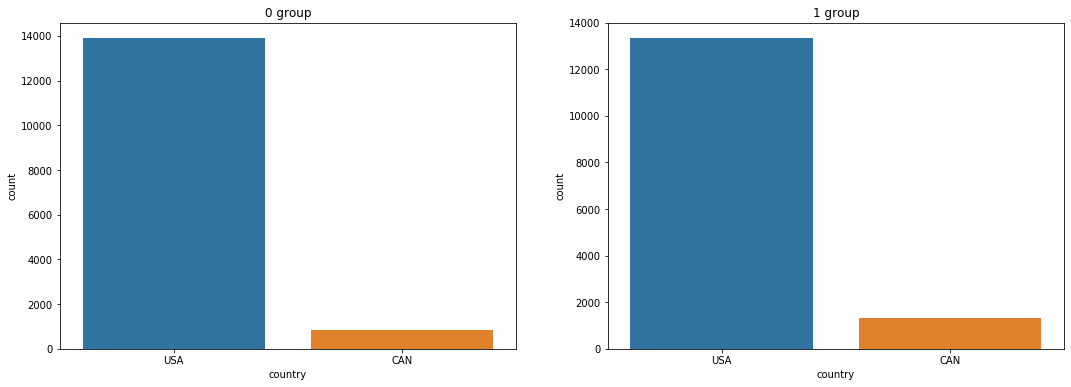

In [65]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title('0 group')
sns.countplot(group_0['country'])

plt.subplot(1, 2, 2)
plt.title('1 group')
sns.countplot(group_1['country'])
plt.show()

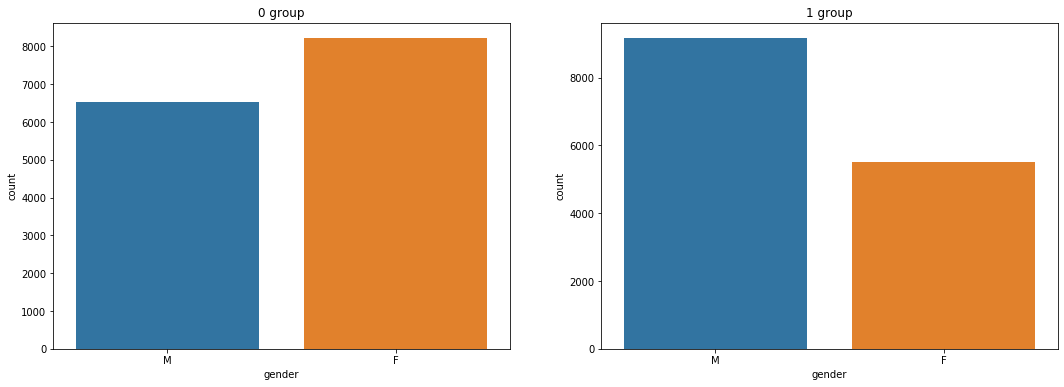

In [66]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title('0 group')
sns.countplot(group_0['gender'])

plt.subplot(1, 2, 2)
plt.title('1 group')
sns.countplot(group_1['gender'])
plt.show()

In [75]:
group_0_top_twenty = group_0.groupby('city').describe()['pace'].sort_values(by='mean')[:20]
index_0 = group_0_top_twenty.index

group_1_top_twenty = group_1.groupby('city').describe()['pace'].sort_values(by='mean')[:20]
index_1 = group_1_top_twenty.index

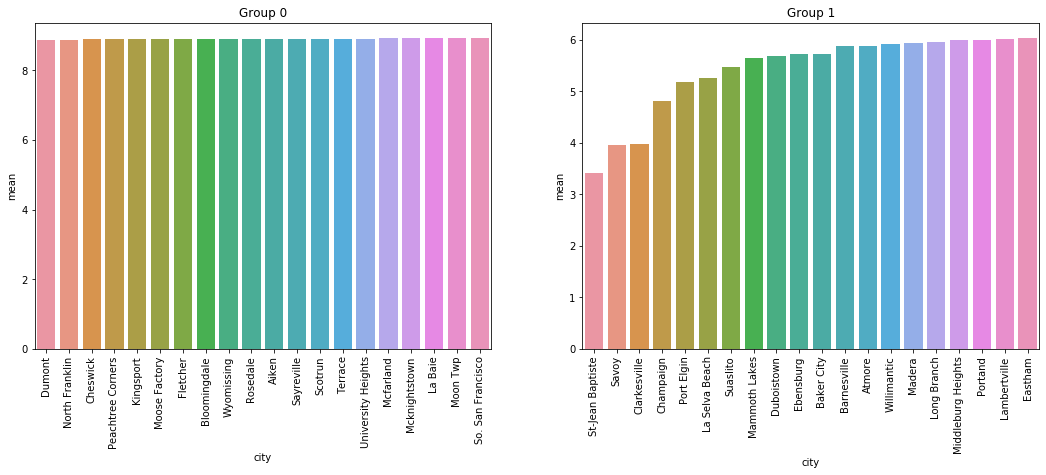

In [78]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.barplot(index_0, group_0_top_twenty['mean'])
plt.xticks(rotation='vertical')
plt.title('Group 0')

plt.subplot(1, 2, 2)
sns.barplot(index_1, group_1_top_twenty['mean'])
plt.xticks(rotation='vertical')
plt.title('Group 1')
plt.show()

In [79]:
group_0.age.describe()

count    14747.000000
mean        44.025022
std         12.244159
min         18.000000
25%         34.000000
50%         44.000000
75%         53.000000
max         81.000000
Name: age, dtype: float64

In [80]:
group_1.age.describe()

count    14661.000000
mean        40.113771
std         10.019627
min         18.000000
25%         32.000000
50%         40.000000
75%         47.000000
max         77.000000
Name: age, dtype: float64

In [82]:
averages_0 = group_0.groupby('age').describe()['overall']['mean']
index_0 = group_0.groupby('age').describe().index

averages_1 = group_1.groupby('age').describe()['overall']['mean']
index_1 = group_1.groupby('age').describe().index

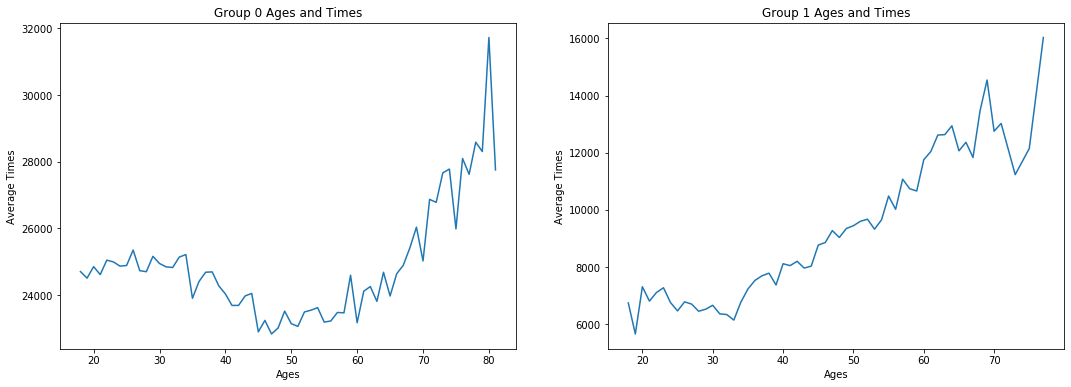

In [83]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.lineplot(index_0, averages_0)
plt.title('Group 0 Ages and Times')
plt.xlabel('Ages')
plt.ylabel('Average Times')

plt.subplot(1, 2, 2)
sns.lineplot(index_1, averages_1)
plt.title('Group 1 Ages and Times')
plt.xlabel('Ages')
plt.ylabel('Average Times')
plt.show()

## Can we predict the 'grouping' of how you'll perform?

In [23]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k'],
      dtype='object')

In [24]:
df['official'].describe()

count    29408.000000
mean       243.867369
std         52.385368
min         84.820000
25%        206.230000
50%        233.100000
75%        274.470000
max        538.880000
Name: official, dtype: float64

In [25]:
def grouping(value):
    if value < 206.23:
        return 'Low'
    elif value >= 206.23 and value < 233.1:
        return 'Medium-Low'
    elif value >= 233.1 and value < 274.47:
        return 'Medium-High'
    else:
        return 'High'

In [44]:
def grouping_2(value):
    if value == 'Medium-Low' or value == 'Low':
        return 'Low'
    else:
        return 'High'

In [26]:
df['placement_grouping'] = df['official'].apply(grouping)

In [54]:
df['2_placement_grouping'] = df['placement_grouping'].apply(grouping_2)

Ok, we have our target defined. Let's make our X and Y's and try different clustering methods!

In [55]:
#with lots of data about how they're doing throughout - only include if you want some data leakage!
numeric_columns = ['10k', '25k', 'age', 'official', '35k', 'pace', '30k', '5k', 'half', '20k', '40k']


gender = pd.get_dummies(df['gender'])
states = pd.get_dummies(df['state'], drop_first=True)
countries = pd.get_dummies(df['country'], drop_first=True)
cities = pd.get_dummies(df['city'], drop_first=True)

dummies_df = pd.concat([gender, states, countries], axis=1)

In [56]:
X = dummies_df
y = df['placement_grouping']

In [57]:
X_norm = normalize(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K means

In [59]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(X_train)

y_preds = kmeans.predict(X_test)

results = pd.crosstab(y_test, y_preds)
results

col_0,0,1,2,3
placement_grouping,,,,
High,328,325,453,358
Low,305,1046,34,99
Medium-High,658,430,206,205
Medium-Low,737,553,68,77


In [60]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y_test, y_preds)

0.08663959128436827

This seems VERY random -> no good!

It barely grouped into 2 and 3. Maybe it performs better with only 2 clusters? Let's see!

In [61]:
y = df['2_placement_grouping']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_train)

y_preds = kmeans.predict(X_test)

results = pd.crosstab(y_test, y_preds)
results

col_0,0,1
2_placement_grouping,,
High,1318,1645
Low,1775,1144


In [63]:
metrics.adjusted_rand_score(y_test, y_preds)

0.026361311972607104

Neither of these are that much better than random guessing! Let's see if some of our other solutions work!

### Mean-shift

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


In [37]:
y_preds = ms.predict(X_test)

results = pd.crosstab(y_test, y_preds)
results

col_0,0,1
placement_grouping,,
High,1174,290
Low,1217,267
Medium-High,905,594
Medium-Low,780,655


In [38]:
low_total = results[0]['Low'] + results[0]['Medium-Low'] + results[1]['Low'] + results[1]['Medium-Low']
high_total = results[0]['Medium-High'] + results[0]['High'] + results[1]['Medium-High'] + results[1]['High']

low_0 = results[0]['Low'] + results[0]['Medium-Low']
print('The low prediction group was {}% accuate'.format(low_0 / low_total * 100))
high_1 = results[1]['Medium-High'] + results[1]['High']
print('The high prediction group was {}% accurate'.format(high_1 / high_total * 100))

The low prediction group was 68.4138403562864% accuate
The high prediction group was 29.834627067161662% accurate


In [39]:
metrics.adjusted_rand_score(y_test, y_preds)

0.02712036143315249

Oof! This might be worse than our other set!